In [235]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
import scipy as sp
from scipy.sparse.linalg import spsolve
%matplotlib inline

In [338]:
def advectionEqn(nCells, dt, filename, xb, Tfinal):
    x0 = 0.0
    xL = 512.0
    dx = (xL-x0)/nCells
    x = np.linspace(x0+0.5*dx, xL-0.5*dx, nCells)
    #xb = 231.0
    #Tfinal = 20.0
    #Initialize fields
    ne = np.zeros(nCells+2)
    neTemp = np.zeros(nCells+2)
    ne[1:-1] = 0.01*np.exp(-0.01*(x - xb)**2)
    ne[0] = -ne[1]
    ne[-1] = ne[-2]
    t = 0.0
    iiter = 1
    exact = lambda x : 0.01*np.exp(-0.01*(x - xb - Tfinal)**2)
    while t < Tfinal:
        
        #This is does 4th order Runge-Kutta (the popular one) with Upwind differencing
        '''k1 = (ne[0:nCells] - ne[1:nCells+1])/dx
        neTemp[1:-1] = ne[1:-1] + 0.5*dt*k1
        neTemp[0] = -neTemp[1]
        neTemp[-1] = neTemp[-2]
        k2 = (neTemp[0:nCells] - neTemp[1:nCells+1])/dx
        neTemp[1:-1] = ne[1:-1] + 0.5*dt*k2
        neTemp[0] = -neTemp[1]
        neTemp[-1] = neTemp[-2]
        k3 = (neTemp[0:nCells] - neTemp[1:nCells+1])/dx
        neTemp[1:-1] = ne[1:-1] + dt*k3
        neTemp[0] = -neTemp[1]
        neTemp[-1] = neTemp[-2]
        k4 = (neTemp[0:nCells] - neTemp[1:nCells+1])/dx
        
        ne[1:-1] = ne[1:-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        ne[0] = -ne[1]
        ne[-1] = ne[-2]'''
        
        #This is the 
        ne[1:-1] = ne[1:-1] - 0.5*(dt/dx)*(ne[2:] - ne[:-2]) + 0.5*((dt/dx)**2)*(ne[2:] - 2.0*ne[1:-1] + ne[:-2])
        
        t = t + dt
        iiter = iiter + 1
        if (ne > 1e5).any():
            print('Solution diverges\n')
            break
    print('Simulation Done, saving data \n')
    np.savetxt(filename+('.txt'), \
               np.asarray([x, ne[1:-1]]).T,delimiter=',')
    plt.plot(x, ne[1:-1],'bo', x, exact(x),'r')
    plt.show()


### Space Convergence- advection

Simulation Done, saving data 



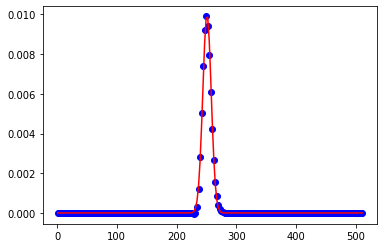

Simulation Done, saving data 



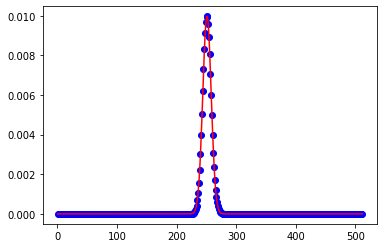

Simulation Done, saving data 



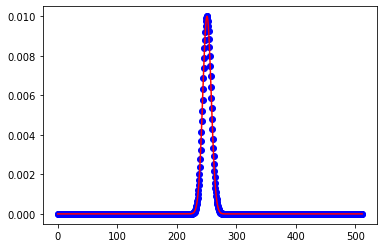

Simulation Done, saving data 



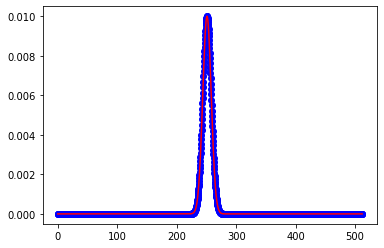

Simulation Done, saving data 



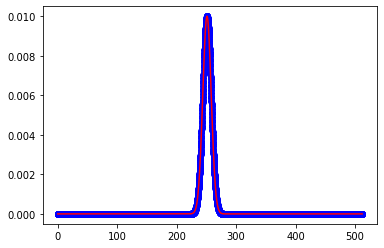

Simulation Done, saving data 



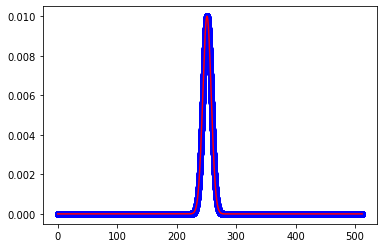

Simulation Done, saving data 



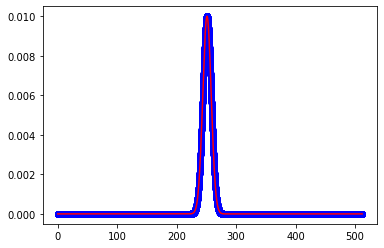

Simulation Done, saving data 



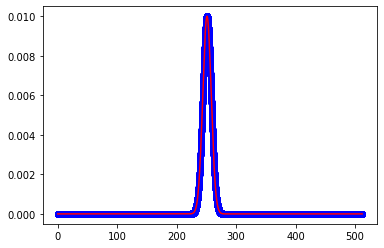

In [340]:
Tfinal = 20.0
xb = 231.0
exact = lambda x : 0.01*np.exp(-0.01*(x - xb - Tfinal)**2)
dt = 0.005
dxVals = 100*(2**np.array([1,2,3,4,5, 6,7,8]))
i = 0

for dx in dxVals:
    filename = 'advection'+str(dx)
    advectionEqn(dx,dt,filename, xb, Tfinal)

In [343]:
#Reading the data generated in the previous cell
i = 0
error = np.zeros(len(dxVals))
data = dict()
for dx in dxVals:
    filename = 'advection'+str(dx)
    data[i] = np.loadtxt(filename+'.txt',delimiter=',')
    error[i] = (np.linalg.norm(data[i][:,1] - exact(data[i][:,0])))/np.sqrt(len(data[i][:,0]))
    i = i+1

slope, intercept = np.polyfit(np.log2(dxVals[:-1]), np.log2(error[:-1]),1)
print(slope, intercept)


-1.99674444004444 2.356680124426528


### Time convergence- advection

Simulation Done, saving data 



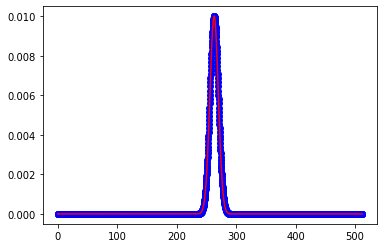

Simulation Done, saving data 



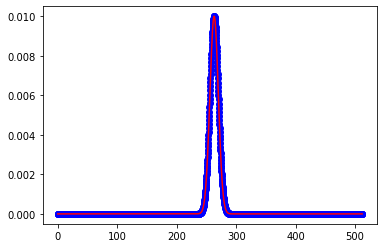

Simulation Done, saving data 



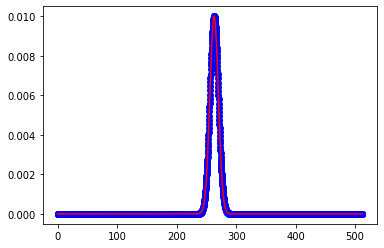

Simulation Done, saving data 



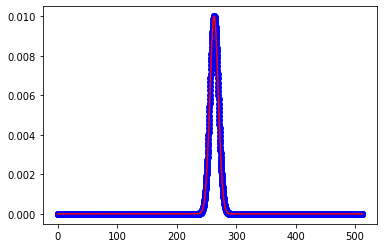

Simulation Done, saving data 



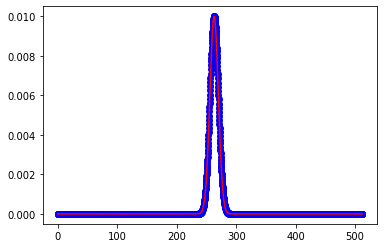

Simulation Done, saving data 



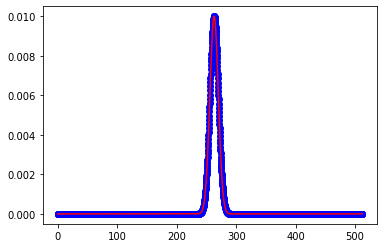

array([ 2.07335486, -8.51018181])

In [346]:
nCells = 512*4
xb = 213.0
Tfinal = 50.0
dtVals = (2**(2.0 + np.arange(6)))**(-1.0)
for dt in dtVals:
    filename = 'advection'+str(dt)
    advectionEqn(nCells,dt,filename, xb, Tfinal)

#Time post processing
#Loading data
uh = np.loadtxt('advection0.25.txt',delimiter=',')
uh2 = np.loadtxt('advection0.125.txt',delimiter=',')
uh4 = np.loadtxt('advection0.0625.txt',delimiter=',')
uh8 = np.loadtxt('advection0.03125.txt',delimiter=',')
uh16 = np.loadtxt('advection0.015625.txt',delimiter=',')
uh32 = np.loadtxt('advection0.0078125.txt',delimiter=',')

error = np.array([np.linalg.norm(uh32[:,1] - uh[:,1]), \
                 np.linalg.norm(uh32[:,1] - uh2[:,1]), \
                 np.linalg.norm(uh32[:,1] - uh4[:,1]), \
                 np.linalg.norm(uh32[:,1] - uh8[:,1]), \
                 np.linalg.norm(uh32[:,1] - uh16[:,1])])

np.polyfit(np.log2(dtVals[1:-1]), np.log2(error[1:]),1)

## Diffusion convergence------------------------------------------------------------

In [348]:
def diffusionEqn(nCells, dt, filename, xb, D):
    x0 = 0.0
    xL = 256.0
    dx = (xL-x0)/nCells
    x = np.linspace(x0+dx, xL-dx, nCells)
    #D = 0.5
    #courant = (D*dt)/(dx**2)
    #print('Courant:', courant)
    #if courant > 0.5:
    #   dt = 0.1*dt
    #dt = (dx**2)/(0.5*D)
    Tfinal = 50.0
    #Initialize fields
    ne = np.zeros(nCells+2)
    neTemp = np.zeros(nCells+2)
    ne[1:-1] = 0.01*np.exp(-0.001*(x - xb)**2)
    ne[0] = -ne[1]
    ne[-1] = ne[-2]
    t = 0.0
    iiter = 1
    #plt.plot(x, ne[1:-1],'b')
    while t < Tfinal:
        k1 = (D/dx**2)*(ne[2:] - 2.0*ne[1:-1] + ne[:-2])
        neTemp[1:-1] = ne[1:-1] + 0.5*dt*k1
        neTemp[0] = -neTemp[1]
        neTemp[-1] = neTemp[-2]
        k2 = (D/dx**2)*(neTemp[2:] - 2.0*neTemp[1:-1] + neTemp[:-2])
        neTemp[1:-1] = ne[1:-1] + 0.5*dt*k2
        neTemp[0] = -neTemp[1]
        neTemp[-1] = neTemp[-2]
        k3 = (D/dx**2)*(neTemp[2:] - 2.0*neTemp[1:-1] + neTemp[:-2])
        neTemp[1:-1] = ne[1:-1] + dt*k3
        neTemp[0] = -neTemp[1]
        neTemp[-1] = neTemp[-2]
        k4 = (D/dx**2)*(neTemp[2:] - 2.0*neTemp[1:-1] + neTemp[:-2])
        ne[1:-1] = ne[1:-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        ne[0] = -ne[1]
        ne[-1] = ne[-2]
        #plt.plot(x, ne[1:-1],'b')
        #plt.show()
        t = t + dt
        iiter = iiter + 1
        if (ne > 1e5).any():
            print('Solution diverges\n')
            break
    print('Simulation Done, saving data \n')
    np.savetxt(filename+('.txt'), \
               np.asarray([x, ne[1:-1]]).T,delimiter=',')
    #plt.plot(x, ne[1:-1],'y')    
    #plt.show()

In [349]:
#Test for diffusion
diffusionEqn(8*256, 0.001, 'diffusion'+str(0.1), 120, 0.5)

Simulation Done, saving data 



### Space convergence- diffusion

In [350]:
dt = 0.005
xb = 120.0
D = 0.5
dxVals = 100*(2**np.array([1,2,3,4,5, 6,7,8]))
for dx in dxVals:
    filename = 'diffusion'+str(dx)
    diffusionEqn(dx,dt,filename, xb, D)

Simulation Done, saving data 

Simulation Done, saving data 

Simulation Done, saving data 

Simulation Done, saving data 

Simulation Done, saving data 

Solution diverges

Simulation Done, saving data 

Solution diverges

Simulation Done, saving data 

Solution diverges

Simulation Done, saving data 



In [ ]:
#Reading the data generated in the previous cell
i = 0
error = np.zeros(len(dxVals))
data = dict()
for dx in dxVals:
    filename = 'diffusion'+str(dx)
    data[i] = np.loadtxt(filename+'.txt',delimiter=',')
    error[i] = (np.linalg.norm(data[i][:,1] - exact(data[i][:,0])))/np.sqrt(len(data[i][:,0]))
    i = i+1

slope, intercept = np.polyfit(np.log2(dxVals[:-1]), np.log2(error[:-1]),1)
print(slope, intercept)

In [108]:
#Assuming piecewise linear solutions



uhFn = interp1d(uh[:,0], uh[:,1],kind='quadratic',fill_value='extrapolate')
uh2Fn = interp1d(uh2[:,0], uh2[:,1],kind='quadratic',fill_value='extrapolate')
uh4Fn = interp1d(uh4[:,0], uh4[:,1],kind='quadratic',fill_value='extrapolate')
uh8Fn = interp1d(uh8[:,0], uh8[:,1],kind='quadratic',fill_value='extrapolate')
uh16Fn = interp1d(uh16[:,0], uh16[:,1],kind='quadratic',fill_value='extrapolate')
exactFn = interp1d(exact[:,0], exact[:,1],kind='quadratic',fill_value='extrapolate')

evalPts = exact[:,0]
error = np.array([np.linalg.norm(exactFn(evalPts) - uhFn(evalPts)), \
                 np.linalg.norm(exactFn(evalPts) - uh2Fn(evalPts)), \
                 np.linalg.norm(exactFn(evalPts) - uh4Fn(evalPts)), \
                 np.linalg.norm(exactFn(evalPts) - uh8Fn(evalPts)), \
                 np.linalg.norm(exactFn(evalPts) - uh16Fn(evalPts))])

'''


error = np.array([np.linalg.norm(exact[:,1] - np.interp(exact[:,0], uh[:,0], uh[:,1])), \
                 np.linalg.norm(exact[:,1] - np.interp(exact[:,0], uh2[:,0], uh2[:,1])), \
                 np.linalg.norm(exact[:,1] - np.interp(exact[:,0], uh4[:,0], uh4[:,1])), \
                 np.linalg.norm(exact[:,1] - np.interp(exact[:,0], uh8[:,0], uh8[:,1])), \
                 np.linalg.norm(exact[:,1] - np.interp(exact[:,0], uh16[:,0], uh16[:,1]))])

'''

np.polyfit(np.log(dxVals[0:-1]), np.log(error),1)

array([ 2.51376724, -3.35620504])

In [98]:
uhavg = np.repeat(uh[:,1],8)
uh2avg = np.repeat(uh2[:,1],4)
uh4avg = np.repeat(uh4[:,1],2)
exact = uh8[:,1]
#uh16avg = np.repeat(uh16[:,1],2)

error = np.array([np.linalg.norm(exact[:] - uhavg), \
                 np.linalg.norm(exact[:] - uh2avg), \
                 np.linalg.norm(exact[:] - uh4avg)])

np.polyfit(np.log2(dxVals[0:-3]), np.log2(error),1)

array([  1.13739195, -10.76787871])

### Steady state convection-diffusion

In [254]:
def steadyCD(dx, Re):
    x0 = 0.0
    xL = 1.0
    nCells = int((xL - x0)/dx)
    u = np.zeros(nCells)
    x = np.linspace(x0+dx, xL-dx, nCells)
    ukCoeffs = (2.0/(Re*dx))*np.ones(nCells)
    ukCoeffs[0] = 0.5 + (3.0/(Re*dx))
    ukCoeffs[-1] = (3.0/(Re*dx)) - 0.5
    ukmCoeffs = (-(2.0/(Re*dx)) - 0.5)*np.ones(nCells-1)
    ukpCoeffs = (-(2.0/(Re*dx)) + 0.5)*np.ones(nCells-1)
    A = sp.sparse.diags([ukCoeffs, ukmCoeffs, ukpCoeffs],[0,-1,1])
    A = A.tocsr()
    b = np.zeros(nCells)
    b[-1] = (2.0/(Re*dx)) - 1.0 
    u = spsolve(A,b)
    exact = lambda x : (np.exp(Re*x) - 1)/(np.exp(Re)-1)
    #plt.plot(x, u, 'b', x, exact(x), 'ro')
    print(A.toarray())

In [255]:
steadyCD(0.1, 10)

[[ 3.5 -1.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [-2.5  2.  -1.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -2.5  2.  -1.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -2.5  2.  -1.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -2.5  2.  -1.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -2.5  2.  -1.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -2.5  2.  -1.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -2.5  2.  -1.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -2.5  2.  -1.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -2.5  2.5]]


In [249]:
spy(A.toarray())

NameError: name 'spy' is not defined

In [271]:
0.015625*0.5

0.0078125